# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Оглавление

1. Изучение данных из файла
2. Подготовка данных
3. Исследовательский анализ данных
4. Проверка гипотез
5. Общий вывод

# 1. Изучение данных из файла 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# База по звонкам
calls_data = pd.read_csv('/datasets/calls.csv')
display(calls_data.head())
calls_data.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [2]:
# База по интернету
internet_data = pd.read_csv('/datasets/internet.csv')
display(internet_data.head())
internet_data.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [3]:
# База по сообщениям
messages_data = pd.read_csv('/datasets/messages.csv')
display(messages_data.head())
messages_data.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [4]:
# База по тарифам
tariffs_data = pd.read_csv('/datasets/tariffs.csv')
tariffs_data.rename(columns={'tariff_name': 'tariff'}, inplace=True)
display(tariffs_data.head())
tariffs_data.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff                 2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [5]:
# База по пользователям
users_data = pd.read_csv('/datasets/users.csv')
display(users_data.head())
users_data.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Вывод**

Всего 5 таблиц, типы данных - float64, int64, object. 

Согласно документации к данным:

Таблица users (информация о пользователях):
    
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tarif` — название тарифного плана

Таблица calls (информация о звонках):
    
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
    
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
    
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

Таблица tariffs (информация о тарифах):
    
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# 2. Подготовка данных 

In [6]:
# Перевожу даты в формат datetime
calls_data['call_date'] = pd.to_datetime(
    calls_data['call_date'], format='%Y-%m-%d'
)
# Добавляю столбец month
calls_data['month'] = calls_data['call_date'].dt.month
display(calls_data.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [7]:
# Перевожу даты в формат datetime
internet_data['session_date'] = pd.to_datetime(
    internet_data['session_date'], format='%Y-%m-%d'
)
# Добавляю столбец month
internet_data['month'] = internet_data['session_date'].dt.month
display(internet_data.head())

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


In [8]:
# Перевожу даты в формат datetime
messages_data['message_date'] = pd.to_datetime(
    messages_data['message_date'], format='%Y-%m-%d'
)
# Добавляю столбец month
messages_data['month'] = messages_data['message_date'].dt.month
display(messages_data.head())

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [9]:
# Перевожу даты в формат datetime
users_data['reg_date'] = pd.to_datetime(
    users_data['reg_date'], format='%Y-%m-%d'
)
# Добавляю столбец month
users_data['month'] = users_data['reg_date'].dt.month
display(users_data.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [10]:
# Группирую базу и нахожу длительность звонков
calls_data = calls_data.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()
# Округляю в большую сторону
calls_data['duration'] = calls_data['duration'].apply(np.ceil).replace(0, 1)
display(calls_data.head())

,user_id,month,duration
0,1000,5,151.0
1,1000,6,159.0
2,1000,7,319.0
3,1000,8,390.0
4,1000,9,441.0


In [11]:
# Группирую базу и нахожу объем израсходованного интернет-трафика
internet_data = internet_data.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
# Округляю в большую сторону
internet_data['mb_used'] = internet_data['mb_used'].apply(np.ceil).replace(0, 1)
display(internet_data.head())

,user_id,month,mb_used
0,1000,5,2254.0
1,1000,6,23234.0
2,1000,7,14004.0
3,1000,8,14056.0
4,1000,9,14569.0


In [12]:
# Группирую базу и нахожу количество отправленных сообщений
messages_data = messages_data.groupby(['user_id', 'month']).agg({'message_date': 'count'}).reset_index()
messages_data.rename(columns={'message_date': 'sms'}, inplace=True)
display(messages_data.head())

,user_id,month,sms
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [13]:
# Объединяю базы в одну общую
data = tariffs_data.merge(users_data, on='tariff', how='outer')        
good_data = calls_data.merge(internet_data, on=['user_id', 'month'], how='outer')
good_data = good_data.merge(messages_data, on=['user_id', 'month'], how='outer')
good_data = good_data.merge(data, on='user_id', how='outer')
display(good_data.head())

,user_id,month_x,duration,mb_used,sms,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,age,churn_date,city,first_name,last_name,reg_date,month_y
0,1000,5.0,151.0,2254.0,22.0,1000,30720,3000,1950,150,1,1,ultra,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,5
1,1000,6.0,159.0,23234.0,60.0,1000,30720,3000,1950,150,1,1,ultra,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,5
2,1000,7.0,319.0,14004.0,75.0,1000,30720,3000,1950,150,1,1,ultra,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,5
3,1000,8.0,390.0,14056.0,81.0,1000,30720,3000,1950,150,1,1,ultra,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,5
4,1000,9.0,441.0,14569.0,57.0,1000,30720,3000,1950,150,1,1,ultra,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,5


In [14]:
# Удаляю лишний столбец
good_data.pop('month_y')
good_data.rename(columns={'month_x': 'month'}, inplace=True)

In [15]:
# Проверяю наличие пропусков
print('Пропуски до (в столбце sms):', good_data['sms'].isna().sum())
print('Пропуски до (в столбце month):', good_data['month'].isna().sum())
print('Пропуски до (в столбце duration):', good_data['duration'].isna().sum())
print('Пропуски до (в столбце mb_used):', good_data['mb_used'].isna().sum())
# Удаляю строки где пропущен месяц
good_data.dropna(subset = ['month'], inplace = True)
# Заполняю пустые значения 0
good_data['sms'] = good_data['sms'].fillna(0)
good_data['duration'] = good_data['duration'].fillna(0)
good_data['mb_used'] = good_data['mb_used'].fillna(0)
# Проверяю наличие пропусков
print('Пропуски после (в столбце sms):', good_data['sms'].isna().sum())
print('Пропуски после (в столбце month):', good_data['month'].isna().sum())
print('Пропуски после (в столбце duration):', good_data['duration'].isna().sum())
print('Пропуски после (в столбце mb_used):', good_data['mb_used'].isna().sum())
# Заменяю тип данных на int
good_data['month'] = good_data['month'].astype('int')
good_data['sms'] = good_data['sms'].astype('int')
good_data['duration'] = good_data['duration'].astype('int')
good_data['mb_used'] = good_data['mb_used'].astype('int')
# Проверяю наличие дубликатов
print('Количество дубликатов:', good_data.duplicated().sum())

Пропуски до (в столбце sms): 499
Пропуски до (в столбце month): 2
Пропуски до (в столбце duration): 42
Пропуски до (в столбце mb_used): 13
Пропуски после (в столбце sms): 0
Пропуски после (в столбце month): 0
Пропуски после (в столбце duration): 0
Пропуски после (в столбце mb_used): 0
Количество дубликатов: 0


In [16]:
# Перевожу в гигабайты
good_data['gb_used'] = (good_data['mb_used'] / 1024)
good_data['gb_included'] = (good_data['mb_per_month_included'] / 1024)
# Округляю в большую сторону
good_data['gb_used'] = good_data['gb_used'].apply(np.ceil).replace(0, 1)

In [17]:
pd.options.display.float_format ='{:,.2f}'.format
# Считаю минуты сверх тарифа
good_data['minutes_over'] = (good_data['duration'] - good_data['minutes_included']) *  good_data['rub_per_minute']
# Привожу отрицательные значения к 0
good_data.loc[good_data['minutes_over'] < 0, 'minutes_over'] = 0
# Считаю гигабайты сверх тарифа
good_data['gb_over'] = (good_data['gb_used'] - good_data['gb_included']) *  good_data['rub_per_gb']
# Привожу отрицательные значения к 0
good_data.loc[good_data['gb_over'] < 0, 'gb_over'] = 0
# Считаю сообщения сверх тарифа
good_data['sms_over'] = (good_data['sms'] - good_data['messages_included']) *  good_data['rub_per_message']
# Привожу отрицательные значения к 0
good_data.loc[good_data['sms_over'] < 0, 'sms_over'] = 0
# Считаю прибыль 
good_data['total_fee'] = good_data['minutes_over'] + good_data['gb_over'] + good_data['sms_over'] + good_data['rub_monthly_fee']
# Заменяю тип данных на int
good_data['gb_used'] = good_data['gb_used'].astype('int')
good_data['gb_included'] = good_data['gb_included'].astype('int')
good_data['minutes_over'] = good_data['minutes_over'].astype('int')
good_data['gb_over'] = good_data['gb_over'].astype('int')
good_data['total_fee'] = good_data['total_fee'].astype('int')
display(good_data.head())
good_data.info()

,user_id,month,duration,mb_used,sms,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,age,churn_date,city,first_name,last_name,reg_date,gb_used,gb_included,minutes_over,gb_over,sms_over,total_fee
0,1000,5,151,2254,22,1000,30720,3000,1950,150,1,1,ultra,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,3,30,0,0,0,1950
1,1000,6,159,23234,60,1000,30720,3000,1950,150,1,1,ultra,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,23,30,0,0,0,1950
2,1000,7,319,14004,75,1000,30720,3000,1950,150,1,1,ultra,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,14,30,0,0,0,1950
3,1000,8,390,14056,81,1000,30720,3000,1950,150,1,1,ultra,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,14,30,0,0,0,1950
4,1000,9,441,14569,57,1000,30720,3000,1950,150,1,1,ultra,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,15,30,0,0,0,1950


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   duration               3214 non-null   int64         
 3   mb_used                3214 non-null   int64         
 4   sms                    3214 non-null   int64         
 5   messages_included      3214 non-null   int64         
 6   mb_per_month_included  3214 non-null   int64         
 7   minutes_included       3214 non-null   int64         
 8   rub_monthly_fee        3214 non-null   int64         
 9   rub_per_gb             3214 non-null   int64         
 10  rub_per_message        3214 non-null   int64         
 11  rub_per_minute         3214 non-null   int64         
 12  tariff                 3214 non-null   object        
 13  age

**Вывод**

1. Сгруппировал таблицы по id и месяцам, потом объединил всё в одну общую таблицу. Посчитал количество израсходованных минут, количество отправленных сообщений, объем израсходованного интернет-трафика по месяцам.
2. В общей таблице были обнаруженны пропущенные значения в столбцах month, duration, sms и mb_used. Строки, где пропущен месяц, в количестве 2 штук удалил, они не подходят для дальнейшего исследования. Остальные пропущенные значения заполнял нулями, потому что пропуск обусловлен тем, что абонент просто не пользовался пакетом услуг. Пропуски в столбце churn_date, потому что абонент пользовался тарифом на момент составления базы или пользуется до сих пор. Их оставил как есть.
3. По условиям Мегалайна округлил гигабайты и минуты в большую сторону.
4. Изменил формат дат на datetime во всех таблицах. Также поменял формат у следующих колонок: month, sms, duration, mb_used, gb_used, gb_included, minutes_over, gb_over, total_fee. Значения в них целочисленные, поэтому для удобства перевел их в int64. Для изменения формата использовал метод astype(), потому что данный метод лучше подходит для решения этой задачи. Метод to_numeric() превращает значения столбца в числовой тип float64 (вещественное число).
5. Дубликатов не обнаружил.     
6. Посчитал помесячную выручку с каждого пользователя, результат в столбце total_fee.

In [18]:
good_data.shape

(3214, 25)

In [19]:
good_data.user_id.nunique()

498

In [20]:
good_data['total_fee'].describe()

count   3,214.00
mean    1,506.62
std       792.80
min       550.00
25%       742.00
50%     1,565.50
75%     1,950.00
max     6,614.00
Name: total_fee, dtype: float64

# 3. Исследовательский анализ данных 

In [21]:
# Вывел среднее количество, дисперсию и стандартное отклонение по минутам
good_data.groupby('tariff').agg({'duration': ['mean', 'var', 'std']})

duration                 
           mean       var    std
tariff                          
smart    394.92 32,392.20 179.98
ultra    497.55 89,953.68 299.92

count     985.00
mean      497.55
std       299.92
min         0.00
25%       268.00
50%       489.00
75%       712.00
max     1,579.00
Name: duration, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Частота')

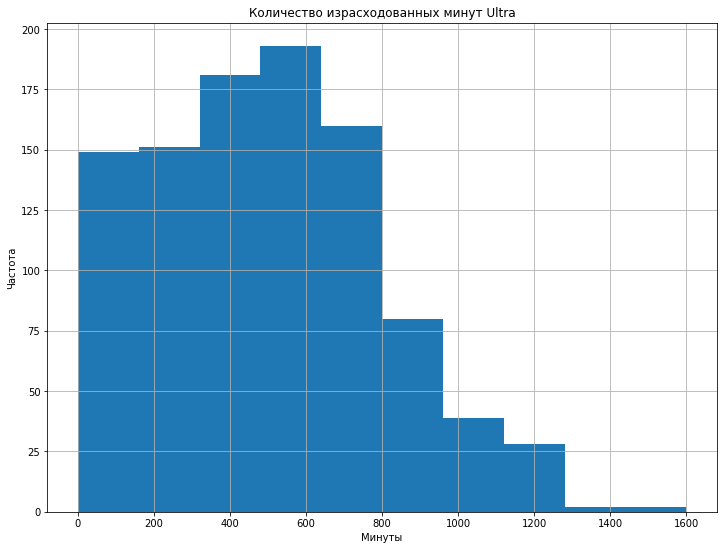

In [22]:
# Сделал срез по тарифу и построил гистограмму по минутам 
ultra_data = good_data.query('tariff == "ultra"')
print(ultra_data['duration'].describe())
print(ultra_data['duration'].hist(bins=10, range=(0, 1600), figsize=(12,9)))
plt.title('Количество израсходованных минут Ultra')
plt.xlabel('Минуты')
plt.ylabel('Частота')

Абоненты тарифа Ultra в основном используют 500-600 минут разговора в месяц. Редко кто пользуется и половиной предложенных минут. Максимальное значение 1579 минут из 3000 возможных. Распределение Пуассона.

count   2,229.00
mean      394.92
std       179.98
min         0.00
25%       268.00
50%       398.00
75%       516.00
max     1,355.00
Name: duration, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Частота')

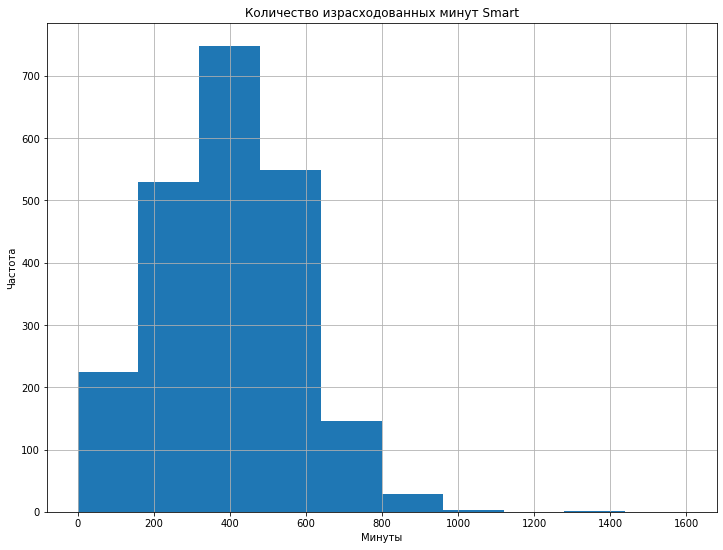

In [23]:
# Сделал срез по тарифу и построил гистограмму по минутам
smart_data = good_data.query('tariff == "smart"')
print(smart_data['duration'].describe())
print(smart_data['duration'].hist(bins=10, range=(0, 1600), figsize=(12,9)))
plt.title('Количество израсходованных минут Smart')
plt.xlabel('Минуты')
plt.ylabel('Частота')

Абоненты тарифа Smart в основном используют от 200 до 600 минут разговора в месяц, больше всего пользователей у значения 350-450 минут, немало пользователей превышают лимит. Максимальное значение 1355 минут, почти в 3 раза больше предложенных. Нормальное распределение. 

In [24]:
# Вывел среднее количество, дисперсию и стандартное отклонение по сообщениям
good_data.groupby('tariff').agg({'sms': ['mean', 'var', 'std']})

sms               
        mean      var   std
tariff                     
smart  33.38   796.81 28.23
ultra  49.36 2,285.27 47.80

count   985.00
mean     49.36
std      47.80
min       0.00
25%       6.00
50%      38.00
75%      79.00
max     224.00
Name: sms, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Частота')

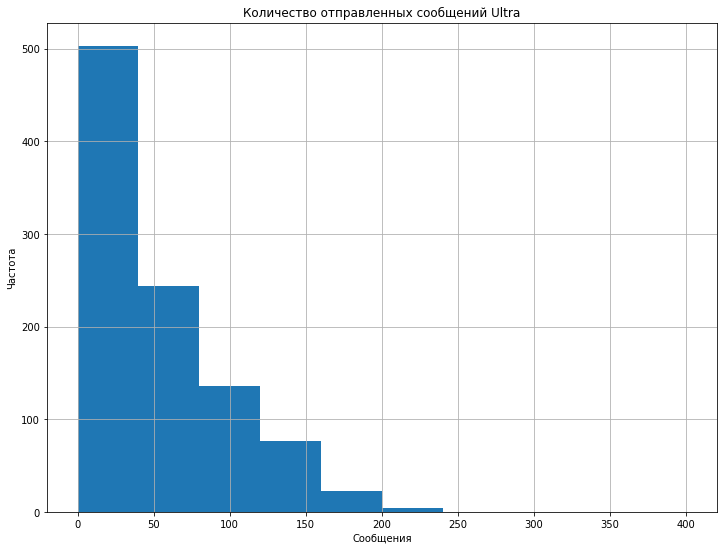

In [25]:
# Построил гистограмму по сообщениям
print(ultra_data['sms'].describe())
print(ultra_data['sms'].hist(bins=10, range=(0, 400), figsize=(12,9)))
plt.title('Количество отправленных сообщений Ultra')
plt.xlabel('Сообщения')
plt.ylabel('Частота')

Абонентам тарифа Ultra в основном нужно до 40 сообщений в месяц. Максимальное значение 224 сообщений из 1000 возможных. Распределение Пуассона. 

count   2,229.00
mean       33.38
std        28.23
min         0.00
25%        10.00
50%        28.00
75%        51.00
max       143.00
Name: sms, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Частота')

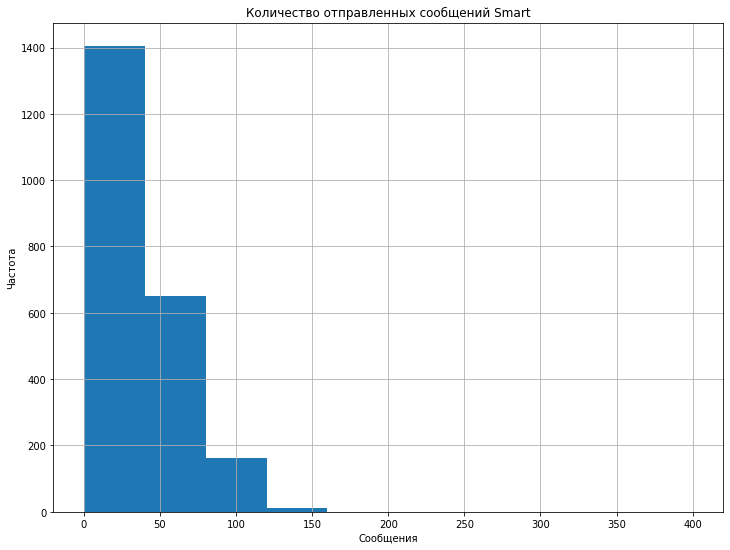

In [26]:
# Построил гистограмму по сообщениям
print(smart_data['sms'].describe())
print(smart_data['sms'].hist(bins=10, range=(0, 400), figsize=(12,9)))
plt.title('Количество отправленных сообщений Smart')
plt.xlabel('Сообщения')
plt.ylabel('Частота')

Абоненты тарифа Smart в основном укладываются в 50 сообщений в месяц, им требуется около 40 сообщений в месяц, 25% выборки превышают лимит. Максимальное значение 143 сообщения. Распределение Пуассона.

In [27]:
# Вывел среднее количество, дисперсию и стандартное отклонение по гигабайтам
good_data.groupby('tariff').agg({'gb_used': ['mean', 'var', 'std']})

gb_used           
          mean   var  std
tariff                   
smart    16.33 33.00 5.74
ultra    19.51 96.67 9.83

count   985.00
mean     19.51
std       9.83
min       1.00
25%      12.00
50%      19.00
75%      27.00
max      49.00
Name: gb_used, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Частота')

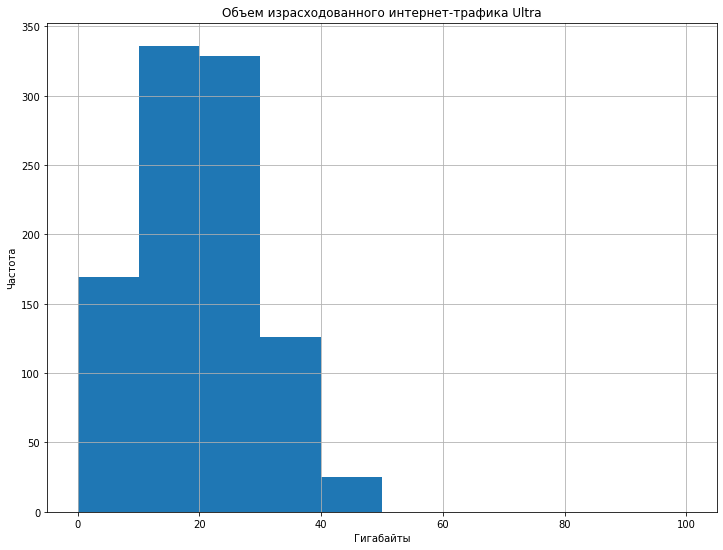

In [28]:
# Построил гистограмму по гигабайтам
print(ultra_data['gb_used'].describe())
print(ultra_data['gb_used'].hist(bins=10, range=(0, 100), figsize=(12,9)))
plt.title('Объем израсходованного интернет-трафика Ultra')
plt.xlabel('Гигабайты')
plt.ylabel('Частота')

Абонентам тарифа Ultra нужно 10-30 Гб интернет-трафика. Около 25% выборки превышают лимит по интернету, в отличие от минут и сообщений. Максимальное значение 49 Гб. Распределение Пуассона.  

count   2,229.00
mean       16.33
std         5.74
min         1.00
25%        13.00
50%        17.00
75%        20.00
max        38.00
Name: gb_used, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Частота')

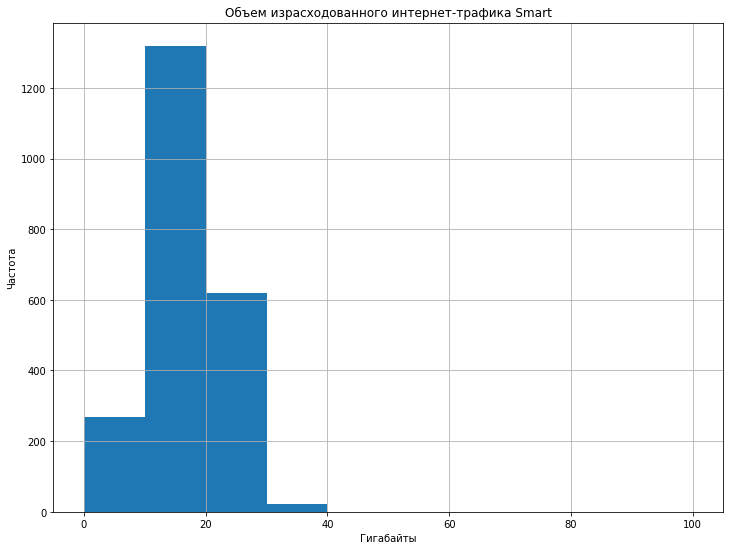

In [29]:
# Построил гистограмму по гигабайтам
print(smart_data['gb_used'].describe())
print(smart_data['gb_used'].hist(bins=10, range=(0, 100), figsize=(12,9)))
plt.title('Объем израсходованного интернет-трафика Smart')
plt.xlabel('Гигабайты')
plt.ylabel('Частота')

Абоненты тарифа Smart в основном используют от 15 до 20 Гб интернет-трафика, часто пользователи выходят за предложенный лимит. Максимальное значение 38 Гб. Распределение Пуассона.

**Вывод**

Абоненты тарифа ультра в целом укладываются в предложенный пакет услуг. Дополнительные траты вызывает только интернет трафик. У пользователей тарифа смарт много дополнительных расходов, они чаще выходят за лимиты по всем предложенным услугам, больше всего по интернет-трафику.   

# 4. Проверка гипотез 

count     985.00
mean    2,070.15
std       376.19
min     1,950.00
25%     1,950.00
50%     1,950.00
75%     1,950.00
max     4,800.00
Name: total_fee, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Частота')

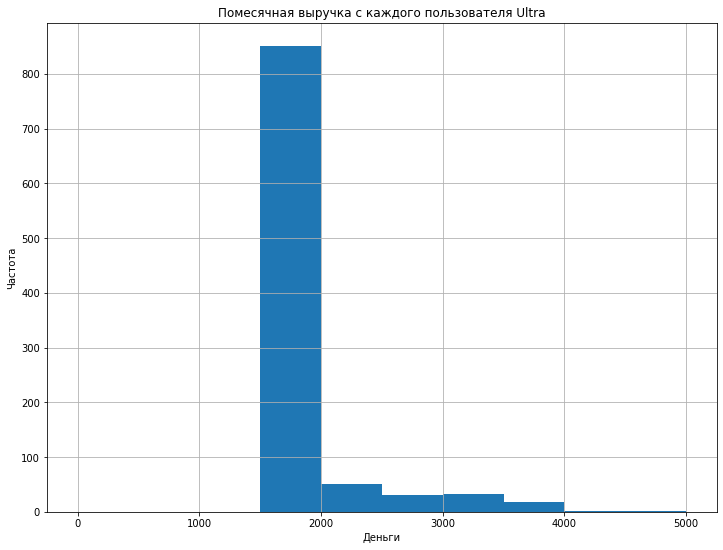

In [30]:
# Построил гистограмму по выручке
print(ultra_data['total_fee'].describe())
print(ultra_data['total_fee'].hist(bins=10, range=(0, 5000), figsize=(12,9)))
plt.title('Помесячная выручка с каждого пользователя Ultra')
plt.xlabel('Деньги')
plt.ylabel('Частота')

count   2,229.00
mean    1,257.59
std       800.92
min       550.00
25%       550.00
50%       962.00
75%     1,733.00
max     6,614.00
Name: total_fee, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Частота')

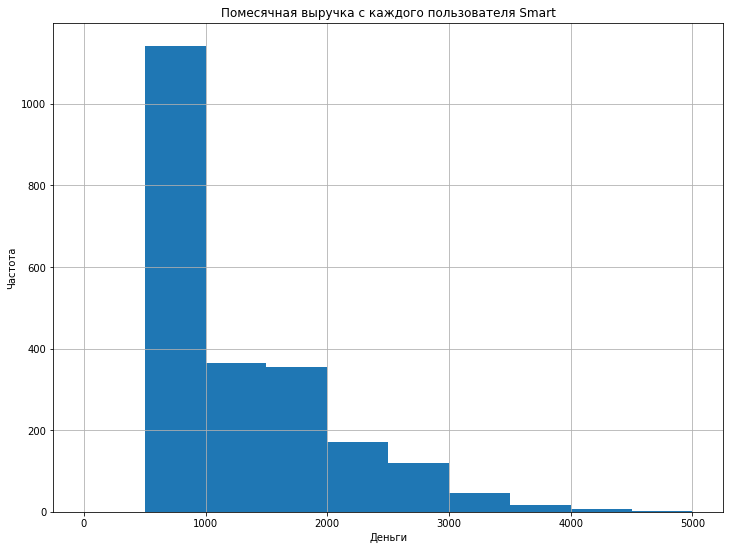

In [31]:
# Построил гистограмму по выручке
print(smart_data['total_fee'].describe())
print(smart_data['total_fee'].hist(bins=10, range=(0, 5000), figsize=(12,9)))
plt.title('Помесячная выручка с каждого пользователя Smart')
plt.xlabel('Деньги')
plt.ylabel('Частота')

Формулировка гипотез:
    
1. Нулевая гипотеза – Средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются, параметры равны.
Альтернативная гипотеза – Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, параметры не равны.
    
2. Нулевая гипотеза - Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, параметры равны. 
Альтернативная гипотеза - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, параметры не равны.
    
H₀ всегда формулируется так, чтобы использовать знак равенства.

In [32]:
# Проверка гипотезы
ultra_fee = good_data[good_data['tariff'] == 'ultra']['total_fee']
smart_fee = good_data[good_data['tariff'] == 'smart']['total_fee']

alpha = 0.05
results = st.ttest_ind(ultra_fee, smart_fee) 
print('p-значение: ', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.513773301175091e-178
Отвергаем нулевую гипотезу


Помесячная выручка с каждого пользователя у двух тарифов разная.

count     611.00
mean    1,526.84
std       750.22
min       550.00
25%       750.00
50%     1,750.00
75%     1,950.00
max     5,186.00
Name: total_fee, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Частота')

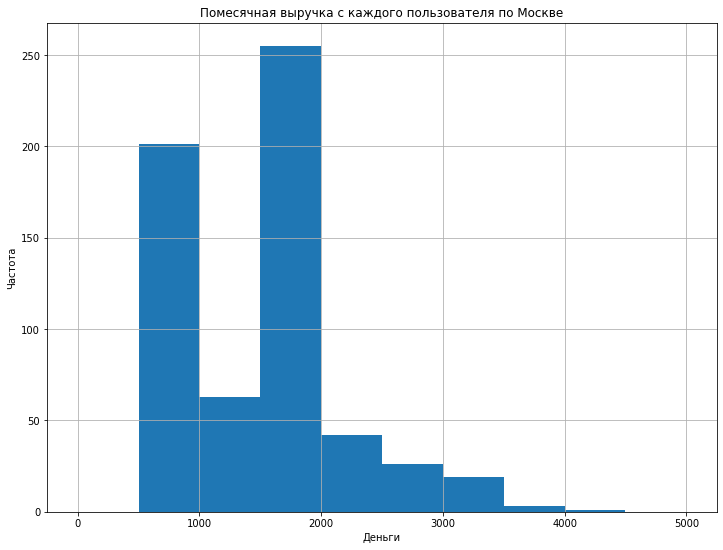

In [33]:
# Сделал срез и построил гистограмму по выручке в Москве
moscow_data = good_data.query('city == "Москва"')
print(moscow_data['total_fee'].describe())
print(moscow_data['total_fee'].hist(bins=10, range=(0, 5000), figsize=(12,9)))
plt.title('Помесячная выручка с каждого пользователя по Москве')
plt.xlabel('Деньги')
plt.ylabel('Частота')

count   2,603.00
mean    1,501.87
std       802.53
min       550.00
25%       716.50
50%     1,550.00
75%     1,950.00
max     6,614.00
Name: total_fee, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Частота')

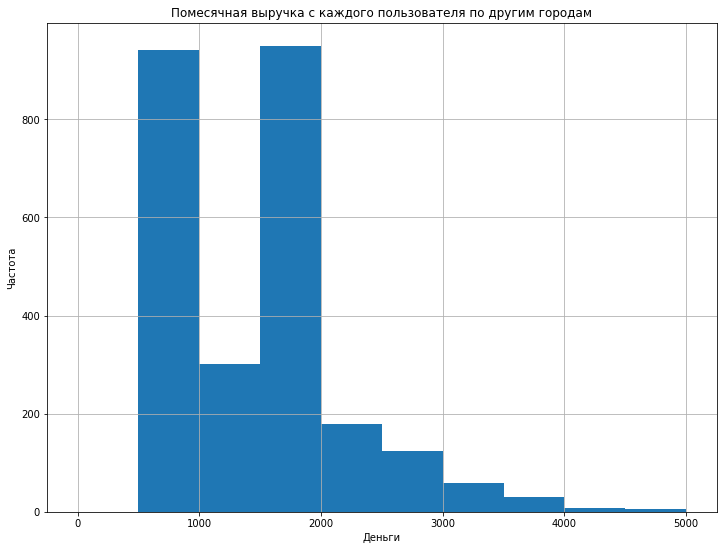

In [34]:
# Сделал срез и построил гистограмму по выручке в других городах
other_data = good_data.query('city != "Москва"')
print(other_data['total_fee'].describe())
print(other_data['total_fee'].hist(bins=10, range=(0, 5000), figsize=(12,9)))
plt.title('Помесячная выручка с каждого пользователя по другим городам')
plt.xlabel('Деньги')
plt.ylabel('Частота')

In [35]:
# Проверка гипотезы
moscow_fee = good_data[good_data['city'] == 'Москва']['total_fee']
other_fee = good_data[good_data['city'] != 'Москва']['total_fee']

alpha = 0.05
results = st.ttest_ind(moscow_fee, other_fee) 
print('p-значение: ', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.4836504757759247
Не получилось отвергнуть нулевую гипотезу


Помесячная выручка с каждого пользователя для Москвы и других городов приблизительно одинакова. Параметры равны. 

**Вывод**

1) Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Формируем двустороннюю гипотезу:

H₀ (нулевая гипотеза) - нет, разницы нет, параметры равны.
Альтернативная гипотеза H₁ - разница есть, параметры не равны.
Исходя из p-значения, нулевая гипотеза была отвергнута. Средняя выручка у двух тарифов различается. У тарифа Ultra выручка больше. Smart - 1257, Ultra - 2070.

2) Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Формируем двустороннюю гипотезу:

H₀ (нулевая гипотеза) - нет, разницы нет, параметры равны.
Альтернативная гипотеза H₁ - разница есть, параметры не равны.
Исходя из p-значения, не получилось отвергнуть нулевую гипотезу. Средняя выручка по Москве и другим городам приблизительно одинакова. По Москве 1526, остальные 1501. Разница в 25 рублей. 

# 5. Общий вывод 

По данным компании «Мегалайн» — федерального оператора сотовой связи, можно сделать несколько выводов:

1. Средняя выручка тарифа Ultra больше, чем у тарифа Smart. Абоненты тарифа ультра в целом укладываются в предложенный пакет услуг. Дополнительные траты вызывает только интернет трафик, минуты расходуются на половину, сообщения еще меньше. У пользователей тарифа смарт много дополнительных расходов, они чаще выходят за лимиты по всем предложенным услугам, больше всего по интернет-трафику. Средняя выручка Ultra - 2070 рублей, средняя выручка Smart - 1257 рублей.   

2. Средняя выручка пользователей из Москвы почти не отличается от выручки пользователей из других регионов. По Москве 1526 рублей, по другим городам 1501 рубль.